# 준비 사항

### 파이썬 버전 = 3.7.3
### 주피터 노트북 필요

## 설치 모듈
nltk, numpy, pandas, matplotlib, wordcloud, mlxtend, networkx <br/>
아나콘다 프롬프트 실행하여 <b>pip install numpy pandas matplotlib nltk wordcloud mlxtend networkx</b> 실행

In [1]:
import re
import numpy as np
from matplotlib import pyplot as plt,rc
import matplotlib.font_manager as fm
from PIL import Image
import nltk
nltk.download() # Corpora 탭의 stopwords, Models 탭의 averaged_perceptron_tag, punkt 설치
from nltk import FreqDist
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tag import pos_tag
from nltk.corpus import stopwords
from string import punctuation
from wordcloud import WordCloud,ImageColorGenerator

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


# 소설 불러오기

In [2]:
alice_file=open('./소설/alice.txt','rt',encoding='utf-8')

alice=alice_file.read()
print(alice)

alice_file.close()

﻿Project Gutenberg’s Alice’s Adventures in Wonderland, by Lewis Carroll

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Alice’s Adventures in Wonderland

Author: Lewis Carroll

Posting Date: June 25, 2008 [EBook #11]
Release Date: March, 1994
Last Updated: October 6, 2016

Language: English

Character set encoding: UTF-8

*** START OF THIS PROJECT GUTENBERG EBOOK ALICE’S ADVENTURES IN WONDERLAND ***










ALICE’S ADVENTURES IN WONDERLAND

Lewis Carroll

THE MILLENNIUM FULCRUM EDITION 3.0




CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, ‘and what is the use of a book,’ tho

파일 내에 필요 없는 부분을 최대한 없애기 위한 작업<br/>
글 내에 *** 을 기준으로 나눔.<br/>
다른 글에서는 다른 방법으로 나누어야 할 수 있음.

In [3]:
alice_split=alice.split('***')
alice=alice_split[2].lower()

print(alice)












alice’s adventures in wonderland

lewis carroll

the millennium fulcrum edition 3.0




chapter i. down the rabbit-hole

alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, ‘and what is the use of a book,’ thought alice ‘without pictures or
conversations?’

so she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy and stupid), whether the pleasure
of making a daisy-chain would be worth the trouble of getting up and
picking the daisies, when suddenly a white rabbit with pink eyes ran
close by her.

there was nothing so very remarkable in that; nor did alice think it so
very much out of the way to hear the rabbit say to itself, ‘oh dear!
oh dear! i shall be late!’ (when she thought it over afterwards, it
occurred to her that she ought to have wondered at this, but at 

# Word Cloud 및 상위 10개 출연 단어 막대 그래프

글 전체의 글자를 활용한 것이므로 문장으로 나누지 않고 글 전체를 word_tokenize 실시

In [4]:
alice_words=word_tokenize(alice)

print('소설의 총 단어 수 :',len(alice_words),end='\n\n')
print('100번째 까지의 단어 :',alice_words[:100])

소설의 총 단어 수 : 34922

100번째 까지의 단어 : ['alice', '’', 's', 'adventures', 'in', 'wonderland', 'lewis', 'carroll', 'the', 'millennium', 'fulcrum', 'edition', '3.0', 'chapter', 'i.', 'down', 'the', 'rabbit-hole', 'alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank', ',', 'and', 'of', 'having', 'nothing', 'to', 'do', ':', 'once', 'or', 'twice', 'she', 'had', 'peeped', 'into', 'the', 'book', 'her', 'sister', 'was', 'reading', ',', 'but', 'it', 'had', 'no', 'pictures', 'or', 'conversations', 'in', 'it', ',', '‘', 'and', 'what', 'is', 'the', 'use', 'of', 'a', 'book', ',', '’', 'thought', 'alice', '‘', 'without', 'pictures', 'or', 'conversations', '?', '’', 'so', 'she', 'was', 'considering', 'in', 'her', 'own', 'mind', '(', 'as', 'well', 'as', 'she', 'could', ',']


첫 번째 stop_words 정의는 기본적인 필요 없는 부분(대명사, 특수문자)을 없애는 데 사용 <br/>
사용 후 100번째 단어까지 출력 했을 때, 걸러지지 않은 단어가 존재 시 그 단어를 복사 붙여넣기를 하여 새 stop_words 정의(두번째 stop_words <br/>
                                                                            정의 코드)

In [5]:
# stop_words=set(stopwords.words('english')+list(punctuation))
stop_words=set(stopwords.words('english')+list(punctuation)+['’','‘'])

tmp=[]

for word in alice_words:
    if word not in stop_words:
        tmp.append(word)

alice_words=tmp

print('소설의 총 단어 수 :',len(alice_words),end='\n\n')
print('100번째 까지의 단어 :',alice_words[:100])

소설의 총 단어 수 : 12586

100번째 까지의 단어 : ['alice', 'adventures', 'wonderland', 'lewis', 'carroll', 'millennium', 'fulcrum', 'edition', '3.0', 'chapter', 'i.', 'rabbit-hole', 'alice', 'beginning', 'get', 'tired', 'sitting', 'sister', 'bank', 'nothing', 'twice', 'peeped', 'book', 'sister', 'reading', 'pictures', 'conversations', 'use', 'book', 'thought', 'alice', 'without', 'pictures', 'conversations', 'considering', 'mind', 'well', 'could', 'hot', 'day', 'made', 'feel', 'sleepy', 'stupid', 'whether', 'pleasure', 'making', 'daisy-chain', 'would', 'worth', 'trouble', 'getting', 'picking', 'daisies', 'suddenly', 'white', 'rabbit', 'pink', 'eyes', 'ran', 'close', 'nothing', 'remarkable', 'alice', 'think', 'much', 'way', 'hear', 'rabbit', 'say', 'oh', 'dear', 'oh', 'dear', 'shall', 'late', 'thought', 'afterwards', 'occurred', 'ought', 'wondered', 'time', 'seemed', 'quite', 'natural', 'rabbit', 'actually', 'took', 'watch', 'waistcoat-pocket', 'looked', 'hurried', 'alice', 'started', 'feet', 'flashe

pos_tag를 활용하여 각 단어의 품사를 표시 <br/>
태그의 의미는 <b>https://dbrang.tistory.com/1139</b>에 나와 있음

In [6]:
tagged_alice=pos_tag(alice_words)

print('소설의 총 단어 수 :',len(tagged_alice),end='\n\n')
print('100번째 까지의 단어와 품사 :',tagged_alice[:100])

소설의 총 단어 수 : 12586

100번째 까지의 단어와 품사 : [('alice', 'NN'), ('adventures', 'NNS'), ('wonderland', 'VBP'), ('lewis', 'JJ'), ('carroll', 'NN'), ('millennium', 'NN'), ('fulcrum', 'NN'), ('edition', 'NN'), ('3.0', 'CD'), ('chapter', 'NN'), ('i.', 'NN'), ('rabbit-hole', 'JJ'), ('alice', 'NN'), ('beginning', 'VBG'), ('get', 'VB'), ('tired', 'JJ'), ('sitting', 'VBG'), ('sister', 'JJ'), ('bank', 'NN'), ('nothing', 'NN'), ('twice', 'RB'), ('peeped', 'VBD'), ('book', 'NN'), ('sister', 'NN'), ('reading', 'NN'), ('pictures', 'NNS'), ('conversations', 'NNS'), ('use', 'VBP'), ('book', 'NN'), ('thought', 'NN'), ('alice', 'NN'), ('without', 'IN'), ('pictures', 'NNS'), ('conversations', 'NNS'), ('considering', 'VBG'), ('mind', 'NN'), ('well', 'NN'), ('could', 'MD'), ('hot', 'VB'), ('day', 'NN'), ('made', 'VBN'), ('feel', 'NN'), ('sleepy', 'JJ'), ('stupid', 'JJ'), ('whether', 'IN'), ('pleasure', 'NN'), ('making', 'VBG'), ('daisy-chain', 'NN'), ('would', 'MD'), ('worth', 'VB'), ('trouble', 'NN'), ('getting'

단어 중, <b>형용사, 명사, 부사</b>를 제외한 다른 단어를 없애는 작업

In [7]:
alice_cleaned=[word[0] for word in tagged_alice if re.match(r'(JJ)|(JJR)|(JJS)|(NN)|(NNS)|(NNP)|(NNPS)|(RB)|(RBR)|(RBS)',word[1])]

print('소설의 총 단어 수 :',len(alice_cleaned),end='\n\n')
print('100번째 까지의 단어 :',alice_cleaned[:100])

소설의 총 단어 수 : 8005

100번째 까지의 단어 : ['alice', 'adventures', 'lewis', 'carroll', 'millennium', 'fulcrum', 'edition', 'chapter', 'i.', 'rabbit-hole', 'alice', 'tired', 'sister', 'bank', 'nothing', 'twice', 'book', 'sister', 'reading', 'pictures', 'conversations', 'book', 'thought', 'alice', 'pictures', 'conversations', 'mind', 'well', 'day', 'feel', 'sleepy', 'stupid', 'pleasure', 'daisy-chain', 'trouble', 'daisies', 'suddenly', 'white', 'rabbit', 'pink', 'eyes', 'close', 'nothing', 'remarkable', 'alice', 'much', 'way', 'hear', 'rabbit', 'dear', 'oh', 'dear', 'late', 'afterwards', 'time', 'quite', 'natural', 'rabbit', 'actually', 'watch', 'waistcoat-pocket', 'hurried', 'alice', 'feet', 'mind', 'never', 'rabbit', 'waistcoat-pocket', 'watch', 'burning', 'curiosity', 'field', 'fortunately', 'time', 'pop', 'large', 'rabbit-hole', 'hedge', 'moment', 'alice', 'never', 'world', 'get', 'rabbit-hole', 'tunnel', 'way', 'suddenly', 'suddenly', 'alice', 'moment', 'deep', 'well', 'either', 'well', 'dee

FreqDist를 활용하여 단어의 수를 세는 작업을 실시

In [8]:
alice_freq=FreqDist(alice_cleaned)

In [9]:
print('총 단어 수 :',alice_freq.N(),end='\n\n')
print('alice 가 나온 횟수 :',alice_freq['alice'],end='\n\n')
print('가장 많이 출연한 상위 10개 단어 :',alice_freq.most_common(10))

총 단어 수 : 8005

alice 가 나온 횟수 : 397

가장 많이 출연한 상위 10개 단어 : [('alice', 397), ('little', 127), ('queen', 75), ('time', 67), ('well', 60), ('turtle', 58), ('hatter', 55), ('mock', 55), ('quite', 54), ('way', 53)]


matplotlib이 기본 글꼴로는 한글이 깨져 환경 설정을 해주는 작업

In [10]:
font_path='C:/Windows/Fonts/gulim.ttc'
font_name=fm.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

## 막대 그래프

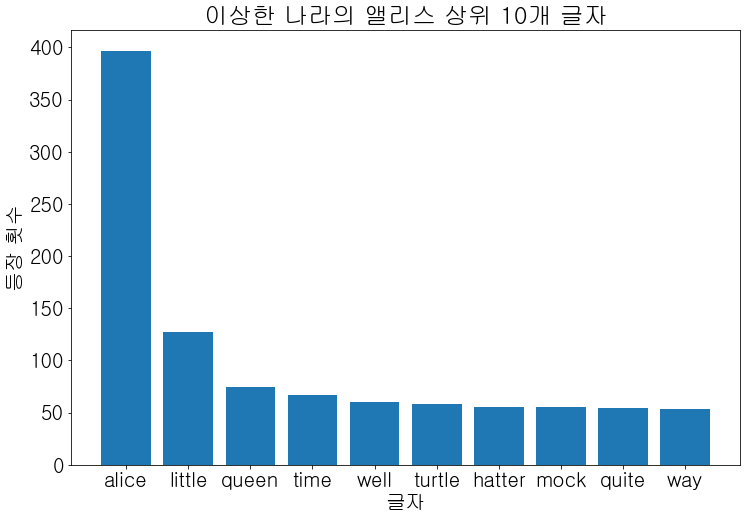

In [11]:
# 상위 10개 단어를 추출

top10=alice_freq.most_common(10)
words=[]
counts=[]

for word,count in top10:
    words.append(word)
    counts.append(count)

    
# 상위 10개 단어 데이터를 통해 막대 그래프를 만들어 준다.

plt.rcParams.update({'font.size':20})
plt.figure(figsize=(12,8))
plt.bar(range(10),counts,align='center',tick_label=words)
plt.xlabel('글자')
plt.ylabel('등장 횟수')
plt.title('이상한 나라의 앨리스 상위 10개 글자')
plt.show()

## 워드 클라우드

(-0.5, 417.5, 703.5, -0.5)

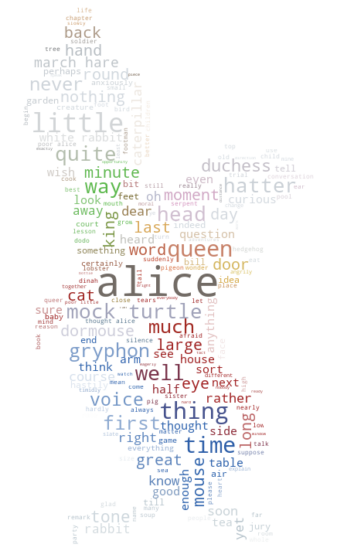

In [12]:
# 이미지 출처 https://all-free-download.com/free-vector/download/the-white-rabbit-from-alice-in-wonderland_6826254.html

alice_pic=np.array(Image.open('rabbit.png')) # 워드 클라우드에 필요한 이미지 불러오기

alice_wc=WordCloud(background_color='white',random_state=20,mask=alice_pic) # 워드 클라우드 제작
alice_wc.generate(' '.join(alice_cleaned)) # 워드클라우드에 사용할 단어 넣어주기

alice_color=ImageColorGenerator(alice_pic) # 글자 색 조정

plt.figure(figsize=(10,10))
plt.imshow(alice_wc.recolor(color_func=alice_color),interpolation='bilinear') # 워드 클라우드 보이기
plt.axis('off') # 축 끄기

# 연관성 분석
연관성 분석은 문장별 단어간의 연관성이므로 글 전체를 나누는 것이 아니라 문장 별로 나눈 후 앞에서 한 작업을 해준다. <br/>
sent_tokenize를 활용하는데, 완벽하지는 않다.

In [13]:
alice_sentences=sent_tokenize(alice)
print('소설의 문장 수 :',len(alice_sentences),end='\n\n')
print('10번째 까지의 문장 :',alice_sentences[:10])

소설의 문장 수 : 975

10번째 까지의 문장 : ['\n\n\n\n\n\n\n\n\n\n\nalice’s adventures in wonderland\n\nlewis carroll\n\nthe millennium fulcrum edition 3.0\n\n\n\n\nchapter i. down the rabbit-hole\n\nalice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or conversations in\nit, ‘and what is the use of a book,’ thought alice ‘without pictures or\nconversations?’\n\nso she was considering in her own mind (as well as she could, for the\nhot day made her feel very sleepy and stupid), whether the pleasure\nof making a daisy-chain would be worth the trouble of getting up and\npicking the daisies, when suddenly a white rabbit with pink eyes ran\nclose by her.', 'there was nothing so very remarkable in that; nor did alice think it so\nvery much out of the way to hear the rabbit say to itself, ‘oh dear!', 'oh dear!', 'i shall be late!’ (when she thought it over afterw

In [14]:
alice_sent_words=[word_tokenize(sentence) for sentence in alice_sentences]
print('단어화 작업 후 10번째 까지의 문장 :',alice_sent_words[:10])

단어화 작업 후 10번째 까지의 문장 : [['alice', '’', 's', 'adventures', 'in', 'wonderland', 'lewis', 'carroll', 'the', 'millennium', 'fulcrum', 'edition', '3.0', 'chapter', 'i.', 'down', 'the', 'rabbit-hole', 'alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank', ',', 'and', 'of', 'having', 'nothing', 'to', 'do', ':', 'once', 'or', 'twice', 'she', 'had', 'peeped', 'into', 'the', 'book', 'her', 'sister', 'was', 'reading', ',', 'but', 'it', 'had', 'no', 'pictures', 'or', 'conversations', 'in', 'it', ',', '‘', 'and', 'what', 'is', 'the', 'use', 'of', 'a', 'book', ',', '’', 'thought', 'alice', '‘', 'without', 'pictures', 'or', 'conversations', '?', '’', 'so', 'she', 'was', 'considering', 'in', 'her', 'own', 'mind', '(', 'as', 'well', 'as', 'she', 'could', ',', 'for', 'the', 'hot', 'day', 'made', 'her', 'feel', 'very', 'sleepy', 'and', 'stupid', ')', ',', 'whether', 'the', 'pleasure', 'of', 'making', 'a', 'daisy-chain', 'would', 'be', 'wort

In [20]:
# stop_words=set(stopwords.words('english')+list(punctuation)+['’','‘'])
stop_words=set(stopwords.words('english')+list(punctuation)+['’','‘','“','”'])

# 문장 별, stop_words 제거
def remove_stop(item):
    tmp=[]
    for word in item:
        if word not in stop_words:
            tmp.append(word)
    return tmp

# 문장 별, 필요한 품사만 남기기

def clean_word(item):
    tagged=pos_tag(item)
    return [word[0] for word in tagged if re.match(r'(JJ)|(JJR)|(JJS)|(NN)|(NNS)|(NNP)|(NNPS)|(RB)|(RBR)|(RBS)',word[1])]


alice_sent_words=[clean_word(remove_stop(row)) for row in alice_sent_words]
print('필요 단어 추출 작업 후 10번째 까지의 문장 :',alice_sent_words[:10])

필요 단어 추출 작업 후 10번째 까지의 문장 : [['alice', 'adventures', 'carroll', 'millennium', 'fulcrum', 'edition', 'chapter', 'i.', 'rabbit-hole', 'alice', 'sister', 'bank', 'nothing', 'twice', 'book', 'sister', 'reading', 'pictures', 'conversations', 'book', 'alice', 'pictures', 'conversations', 'well', 'day', 'sleepy', 'stupid', 'pleasure', 'daisy-chain', 'trouble', 'daisies', 'suddenly', 'white', 'rabbit', 'eyes', 'close'], ['nothing', 'remarkable', 'alice', 'much', 'way', 'hear', 'rabbit', 'dear'], ['dear'], ['late', 'afterwards', 'time', 'quite', 'natural', 'rabbit', 'actually', 'waistcoat-pocket', 'hurried', 'alice', 'feet', 'never', 'waistcoat-pocket', 'watch', 'curiosity', 'field', 'fortunately', 'time', 'pop', 'large', 'rabbit-hole', 'hedge'], ['moment', 'alice', 'never', 'world', 'get'], ['rabbit-hole', 'tunnel', 'way', 'suddenly', 'suddenly', 'alice', 'moment', 'deep', 'well'], ['either', 'well', 'deep', 'slowly', 'plenty', 'time', 'look', 'happen'], ['first', 'tried', 'look', 'dark', 'any

## 연관성 분석 결과 보이기
연관성 분석을 위한 코드 자체가 어려워 학생들이 지지도, 신뢰도, 향상도의 개념만 활용하여 연관성 분석 결과 그래프를 만들 수 있게 코드를 구성하였음.<br/>
<b>apriori 알고리즘</b>과 <b>mlxtend, networkx</b> 모듈 활용

In [16]:
def make_rules(book,min_sup=0.02,min_conf=0.5,rule_count=10): # 최소 지지도 0.02, 최소 신뢰도 0.5, 최대 연관성 결과 10개로 초기 셋팅
                                                              # 학생들이 필요시 해당 매개변수를 조정하게끔 지도 필요
    import pandas as pd
    from mlxtend.preprocessing import TransactionEncoder
    from mlxtend.frequent_patterns import apriori,association_rules
    te=TransactionEncoder()
    te_trans=te.fit(book).transform(book)
    trans_df=pd.DataFrame(te_trans,columns=te.columns_)
    
    apr=apriori(trans_df,min_support=min_sup,use_colnames=True)
    rules=association_rules(apr,metric='lift',min_threshold=1)
    rules=rules[rules['confidence']>=min_conf].iloc[:,[0,1,4,5,6]]
    rules.sort_values(by='lift',ascending=False,inplace=True)
    rules=rules.iloc[0:rule_count,]
    
    return rules

In [17]:
def make_graph(rules,distance=5): # 노드간 거리를 5로 하였는데 조정을 하면 노드간 거리가 변경되어 다른 형태의 그래프 그리기 가능
    import networkx as nx
    import math
    tmp=rules['antecedents'].tolist()+rules['consequents'].tolist()
    tmp=[list(x) for x in tmp]
    tmp=[e for row in tmp for e in row]
    tmp=list(dict.fromkeys(tmp))
    
    bridge_count=len(rules.index)
    bridge=['N%d'%i for i in range(1,(bridge_count+1))]
    
    G=nx.DiGraph()
    G.add_nodes_from(tmp)
    G.add_nodes_from(bridge)
    
    color=[]
    size=[]

    for node in G.nodes:
        if node in tmp:
            color.append('green')
            size.append(500)
        else:
            color.append('yellow')
            size.append(150)

    tmp_label={word:word for word in tmp}
    bridge_label={word:word for word in bridge}
    tmp_label_pos={}

    for i in range(bridge_count):
        start=list(rules['antecedents'].tolist()[i])
        end=list(rules['consequents'].tolist()[i])
        w=rules['lift'].tolist()[i]
        weight=math.log10(w)
        if i>bridge_count/2:
            c='b'
        else:
            c='r'
        for s in start:
            G.add_edge(s,'N%d'%(i+1),color=c,weight=weight)
        for e in end:
            G.add_edge('N%d'%(i+1),e,color=c,weight=weight)

    pos = nx.spring_layout(G,k=distance)
    for k,v in pos.items(): 
        tmp_label_pos[k]=(v[0],v[1]+0.07)

    edges=G.edges
    edge_colors=[G[s][e]['color'] for s,e in edges]
    edge_weights=[G[s][e]['weight'] for s,e in edges]

    plt.figure(figsize=(10,7))
    nx.draw(G,pos,node_color=color,with_labels=False,node_size=size,edge_color=edge_colors,width=edge_weights)
    nx.draw_networkx_labels(G,tmp_label_pos,labels=tmp_label,font_size=20,font_weight='bold')
    nx.draw_networkx_labels(G,pos,labels=bridge_label)

In [23]:
rules_df=make_rules(alice_sent_words)
rules_df

,antecedents,consequents,support,confidence,lift
16,(hare),(march),0.026667,0.896552,32.375479
17,(march),(hare),0.026667,0.962963,32.375479
20,(rabbit),(white),0.024615,0.615385,20.689655
21,(white),(rabbit),0.024615,0.827586,20.689655
18,(turtle),(mock),0.045128,0.862745,18.286445
19,(mock),(turtle),0.045128,0.956522,18.286445
4,(nothing),(alice),0.024615,0.727273,2.025974
2,(much),(alice),0.032821,0.666667,1.857143
14,(well),(alice),0.034872,0.618182,1.722078
6,(quite),(alice),0.026667,0.577778,1.609524


c:\users\user\anaconda3\envs\test\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
c:\users\user\anaconda3\envs\test\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
c:\users\user\anaconda3\envs\test\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


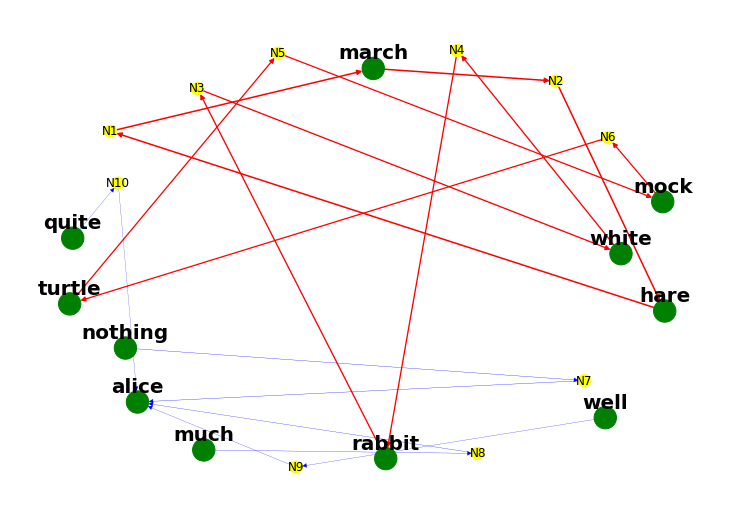

In [22]:
make_graph(rules_df)